# **Key Points of Chapter-4 : Training Models**

1. **Linear Regression & the Normal Equation:**
 - Linear regression finds the best fitting straight lin through data.
 - The Normal Equation provides a direct mathematical solution without iteration.

2. **Computational Cost of Normal Equation:**
 - Works well for small to medium datasets.
 - Computational cost is roughly $ O(n^2.4)$ to $O(n^3)$ with respect to number of features.

3. **Gradient Descent (GD):**
 - Iterative optimization algorithm that minimizes the cost function by updating parameters.

4. **Learning Rate Selection:**
 - Too small = slow convergence.
 - Too large = overshooting or divergence.

5. **Batch Gradient Descent:**
 - Uses entire training set to compute gradients.
 - Stable but slow on large datasets.

6. **Stochastic Gradient Descent (SGD):**
 - Uses one random instance per iteration.
 - Much faster and suitable for online learning.
 - Introduces noise; leads to oscillations around the minimum.

7. **Mini-batch Gradient Descent:**
 - A compromise between batch and SGD.
 - Uses a small random subset of training instances per step.
 - Fast and takes advantage of GPU acceleration.

8. **Polynomial Regression:**
 - Adds polynomial features (eg. $x^2, x^3$) to capture non-linearity.
 - Use PolynomialFeatures from Scikit-Learn to implement.

9. Overfitting in Polynomial Regression:
 - Higher-Degree polynomial can fit training data very well but generalize poorly.
 - Visual sign: very wavy or spiky curve.

10. **Regularization:**
 - Helps combat overfitting by penalizing large weights.
    -- Ridge Regression (L2)
    -- Lasso Regression (L1)

11. **Elastic Net:**
 - It is combination of Ridge and Lasso Regression.

12. **Early Stopping:**
 - A form of regularization.
 - Stop training when validation error starts increasing.

13. **Logistic Regression:**
 - It is used for classification, not for regression.
 - Outputs probabilities using the sigmoid function:

14. **Decision Boundaries & Evaluation:**
 - Logistic Regression sets a threshold (default 0.5) to classify.
 - Good to visualize decision boundaries and plot learning curves to understand model bias/variance.


  



---



---



# ***Exercise***

**Question No. 1:**

What Linear Regression training algorithm can you use if you have a training set
with millions of features?

***Answer:***

If we have a training set with millions of features, the most suitable algorithm for training a Linear Regression model is Stochastic Gradient Descent (SGD). This is because traditional methods like the Normal Equation become computationally infeasible due to the need to invert a very large matrix, which is both slow and memory-intensive.

Similarly, Batch Gradient Descent is inefficient as it processes the entire dataset in every iteration. In contrast, SGD updates model weights using one training instance at a time, making it much more scalable and faster for high-dimensional datasets. It also supports online learning and works well with sparse data, which is common in such large feature spaces.




---



---



**Question No. 2:**

 Suppose the features in your training set have very different scales. What algo‐
rithms might suffer from this, and how? What can you do about it?

***Answer:***

If the features in our training set have very different scales, algorithms that rely on gradient descent—such as Linear Regression with SGD, Logistic Regression, and Neural Networks—can suffer significantly. This is because gradients will be steeper along the dimensions with larger values, causing the algorithm to take uneven steps and possibly converge very slowly or diverge altogether. Additionally, algorithms like SVMs and K-Nearest Neighbors can also be affected because they rely on distance calculations.

To address this issue, we should scale our features using techniques like Standardization (subtract the mean and divide by the standard deviation) or Min-Max Scaling to bring all features to a similar range. This ensures the algorithm treats all features equally during optimization.





---


---





**Question No. 3:**

Can Gradient Descent get stuck in a local minimum when training a Logistic
Regression model?

***Answer:***

No, Gradient Descent does not get stuck in a local minimum when training a Logistic Regression model. This is because the cost function of Logistic Regression is convex, meaning it has a single global minimum and no local minima. In a convex function, any local minimum is also the global minimum.

Therefore, as long as the learning rate is set properly and the algorithm converges, Gradient Descent will find the optimal solution. However, it can still get stuck or oscillate if the learning rate is too high, but that’s not due to local minima, it’s due to poor optimization settings.






---



---



**Question No. 4:**

Do all Gradient Descent algorithms lead to the same model provided you let
them run long enough?

***Answer:***

No, not all Gradient Descent algorithms necessarily lead to the exact same model, even if we let them run for a long time. Batch Gradient Descent will converge to the global minimum (for convex problems like Linear or Logistic Regression).

However, Stochastic Gradient Descent (SGD) and Mini-Batch Gradient Descent introduce randomness due to sampling, which can cause them to oscillate around the minimum rather than settle precisely on it. While they often get very close to the optimal solution, the final model may slightly differ due to this noise, especially if we don't use techniques like learning rate decay or averaging.








---



---



**Question No. 5:**

Suppose you use Batch Gradient Descent and you plot the validation error at
every epoch. If you notice that the validation error consistently goes up, what is
likely going on? How can you fix this?

**Answer:**

If we're using Batch Gradient Descent and notice that the validation error consistently increases with each epoch, it's a strong sign that our model is overfitting the training data. This means it's learning the training set too well, including its noise, and failing to generalize to unseen data.
To fix this, we can apply regularization (Ridge or Lasso for regression), reduce the model complexity (such as lowering the polynomial degree), or use early stopping to halt training when the validation error starts to rise. Additionally, gathering more training data or using data augmentation can also help improve generalization.





---



---



**Question No. 6:**

Is it a good idea to stop Mini-batch Gradient Descent immediately when the vali‐
dation error goes up?

***Answer:***

No, it's not a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up. This is because Mini-batch Gradient Descent introduces random noise in each update due to using small batches of data. As a result, the validation error may fluctuate slightly from one epoch to another even when the model is generally improving. Instead of stopping immediately, it's better to use early stopping with patience—that is, allow training to continue for a few more epochs to see if the validation error improves before deciding to stop. This approach balances avoiding premature stopping with preventing overfitting.




---



---



**Question No. 7:**

Which Gradient Descent algorithm (among those we discussed) will reach the
vicinity of the optimal solution the fastest? Which will actually converge? How
can you make the others converge as well?

**Answer:**

Stochastic Gradient Descent (SGD) typically reaches the vicinity of the optimal solution the fastest because it makes rapid updates using individual training examples, allowing it to quickly explore the cost surface. However, due to its noisy updates, it often does not fully converge, instead oscillating around the minimum. On the other hand, Batch Gradient Descent converges more steadily and actually reaches the minimum, but it is slower because it computes gradients over the entire dataset each time. Mini-batch Gradient Descent offers a good trade-off faster than batch and more stable than SGD. To help SGD and Mini-batch GD converge, we can apply learning rate scheduling (gradually decreasing the learning rate), momentum, or averaging the weights over time.








---



---



**Question No. 8:**

Suppose you are using Polynomial Regression. You plot the learning curves and
you notice that there is a large gap between the training error and the validation
error. What is happening? What are three ways to solve this?

***Answer:***

If we are using Polynomial Regression and observe a large gap between the training error and validation error in the learning curves, our model is likely overfitting the training data. This means it's capturing noise and complex patterns that don't generalize well to unseen data.

**Three ways to solve this:**

 - Reduce model complexity:
Lower the degree of the polynomial to simplify the model and prevent it from fitting noise.

 - Regularization:
Apply Ridge (L2) or Lasso (L1) regression to penalize large coefficients and reduce overfitting.

 - Increase training data:
Providing more data can help the model learn more general patterns and reduce the gap between training and validation error.



---



---



**Question No. 9:**

 Suppose you are using Ridge Regression and you notice that the training error
and the validation error are almost equal and fairly high. Would you say that the
model suffers from high bias or high variance? Should you increase the regulari‐
zation hyperparameter α or reduce it?

***Answer:***

If both the training error and validation error are high and nearly equal when using Ridge Regression, the model is suffering from high bias. This indicates that the model is too simple to capture the underlying patterns in the data. In this case, we will reduce the regularization hyperparameter α. A smaller α will allow the model to fit the data more flexibly by reducing the penalty on large coefficients, which can help lower the bias and improve performance.







---



---




**Question No. 10:**

Why would you want to use:
- Ridge Regression instead of plain Linear Regression (i.e., without any regulari‐
zation)?
- Lasso instead of Ridge Regression?
- Elastic Net instead of Lasso?

***Answer:***



1.   We would use Ridge Regression instead of plain Linear Regression when our model is overfitting, especially in cases where there are many features or multicollinearity (highly correlated features). Ridge helps by shrinking the coefficients, which reduces variance and improves generalization.
2.   We would choose Lasso Regression over Ridge when we suspect that only a few features are important. Lasso can shrink some coefficients exactly to zero, effectively performing feature selection, which makes the model simpler and more interpretable.
3. we would use Elastic Net instead of Lasso when we have many correlated features. While Lasso tends to pick just one feature from a group and ignore the others, Elastic Net (a mix of L1 and L2 regularization) can retain multiple correlated features, providing a more balanced and stable solution.










---



---



**Question No. 11:**

Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime.
Should you implement two Logistic Regression classifiers or one Softmax Regres‐
sion classifier?

***Answer:***

In this case, we will implement two separate Logistic Regression classifiers, one for outdoor vs indoor and another for daytime vs nighttime. This is because these are two independent binary classification problems, not multiple classes of a single categorical target. Softmax Regression (also called Multinomial Logistic Regression) is suitable when the task involves multiple exclusive classes, such as classifying an image into exactly one category out of several (cat, dog, horse). Since an image here can be indoor & daytime, or outdoor & nighttime, two binary classifiers are the correct approach.







---



---



**Question No. 12:**

Implement Batch Gradient Descent with early stopping for Softmax Regression
(without using Scikit-Learn).

***Answer:***

In [ ]:
import numpy as np

# 1. Softmax function
def softmax(logits):
    exp_scores = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # stability trick
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# 2. Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_probs = -np.log(y_pred[range(m), y_true])
    return np.sum(log_probs) / m

# 3. Accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# 4. One-hot encoding
def one_hot(y, num_classes):
    m = y.shape[0]
    one_hot_y = np.zeros((m, num_classes))
    one_hot_y[np.arange(m), y] = 1
    return one_hot_y

# 5. Softmax Regression class
class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, n_epochs=1000, early_stopping_rounds=10, tol=1e-4):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.early_stopping_rounds = early_stopping_rounds
        self.tol = tol

    def fit(self, X, y, X_val=None, y_val=None):
        m, n = X.shape
        self.num_classes = np.max(y) + 1
        self.theta = np.random.randn(n, self.num_classes) * 0.01
        y_one_hot = one_hot(y, self.num_classes)

        best_loss = np.inf
        no_improve_count = 0

        for epoch in range(self.n_epochs):
            # Forward pass
            logits = X @ self.theta
            probs = softmax(logits)

            # Loss and gradient
            loss = cross_entropy_loss(y, probs)
            gradient = X.T @ (probs - y_one_hot) / m

            # Update weights
            self.theta -= self.learning_rate * gradient

            # Early stopping check
            if X_val is not None and y_val is not None:
                val_logits = X_val @ self.theta
                val_probs = softmax(val_logits)
                val_loss = cross_entropy_loss(y_val, val_probs)

                print(f"Epoch {epoch+1} - Train Loss: {loss:.4f} | Val Loss: {val_loss:.4f}")

                if best_loss - val_loss > self.tol:
                    best_loss = val_loss
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= self.early_stopping_rounds:
                    print("Early stopping triggered.")
                    break
            else:
                print(f"Epoch {epoch+1} - Loss: {loss:.4f}")

    def predict(self, X):
        logits = X @ self.theta
        probs = softmax(logits)
        return np.argmax(probs, axis=1)


To implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn), I used NumPy to build the softmax function, cross-entropy loss, and gradient updates. I monitored the validation loss at each epoch, and applied early stopping when the validation loss didn’t improve for several consecutive epochs. This prevents overfitting and ensures efficient training.







---



---



# **Create Comparative Notes**

## **Gradient Descent variants’ convergence patterns**

1. **Batch Gradient Descent**

 - Processes the entire training set in each iteration.

 - Very stable and moves smoothly toward the global minimum (for convex problems).

 - Converges slowly when dataset is large.

 - Best suited for small to medium-sized datasets.

2. **Stochastic Gradient Descent (SGD)**

 - Updates the model using only one training instance per iteration.

 - Much faster in reaching the vicinity of the minimum.

 - The path is noisy and may fluctuate around the minimum.

 - Ideal for very large datasets or online learning tasks.

3. **Mini-batch Gradient Descent**

 - Uses small random batches of training data per step.

 - Balances the speed of SGD and the stability of Batch GD.

 - Commonly used in practice, especially for training neural networks.



## Regularization Effects on Model Coefficients

1. **No Regularization (Plain Linear Model)**

 - Fits the training data closely.

 - Can lead to overfitting, especially when many features are present.

2. **Ridge Regression (L2 Regularization)**

 - Adds a penalty on the squared values of coefficients.

 - Shrinks coefficients but does not set them to zero.

 - Works well when many features are correlated.

3. **Lasso Regression (L1 Regularization)**

 - Adds a penalty on the absolute values of coefficients.

 - Can shrink some coefficients exactly to zero — useful for feature selection.

 - Best for high-dimensional or sparse datasets.

4. **Elastic Net**

 - Combines both L1 and L2 penalties.

 - Encourages sparsity like Lasso but is more stable when features are correlated.

 - Recommended when Lasso is too aggressive or data is noisy.





---



---



# **Model Training on Bike Sharing Dataset**

### 1. Upload the ZIP file

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bike+sharing+dataset.zip to bike+sharing+dataset.zip


### 2. Extract the ZIP file

In [ ]:
import zipfile
import os

zip_file_name = "bike+sharing+dataset.zip"

# Unzip it
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("bike_data")

# List extracted files
os.listdir("bike_data")


['hour.csv', 'day.csv', 'Readme.txt']

### 3. Load the day.csv file

In [ ]:
import pandas as pd

# Load the daily data
df = pd.read_csv("bike_data/day.csv")

# Preview the dataset
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 4. import libraries

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### 5. Pre-processing

In [ ]:
# Drop unnecessary columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Target variable
y = df['cnt']
X = df.drop('cnt', axis=1)

# Preview data
print("Features:\n", X.columns.tolist())
print("\nTarget:\n", y.name)
df.head()

Features:
 ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

Target:
 cnt


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


### 6. Scaling and Train/Test Split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### 7. Feature Engineering with Polynomial Expansion

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Number of original features:", X.shape[1])
print("Number of polynomial features:", X_train_poly.shape[1])


Number of original features: 11
Number of polynomial features: 77


### 8.  Model Training (Linear, Ridge, Lasso, SGD)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_poly, y_train)



LinearRegression()

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)


Ridge()

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.098e+07, tolerance: 2.141e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [ ]:
# SGD Regressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train_poly, y_train)

SGDRegressor()

### 9. Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

models = {'Linear': lr, 'Ridge': ridge, 'Lasso': lasso, 'SGD': sgd}

for name, model in models.items():
    y_pred = model.predict(X_test_poly)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> RMSE: {rmse:.2f}, R²: {r2:.3f}")


Linear -> RMSE: 823795.06, R²: 0.795
Ridge -> RMSE: 529583.93, R²: 0.868
Lasso -> RMSE: 598762.48, R²: 0.851
SGD -> RMSE: 13894238079745135738880.00, R²: -3464998989946271.000


### 10. Plot Learning Curves

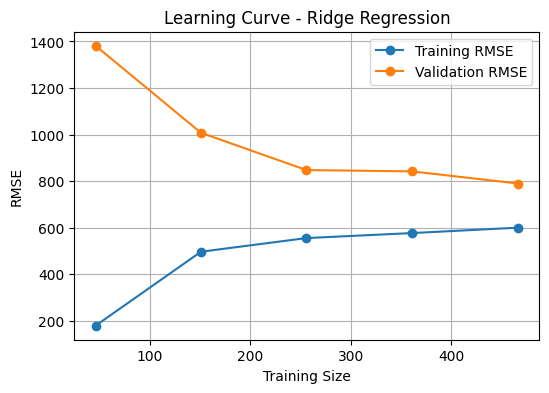

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_root_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training RMSE")
    plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation RMSE")
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Ridge Regression
plot_learning_curve(ridge, X_train_poly, y_train, "Learning Curve - Ridge Regression")


### 11. Hyperparameter Tuning (Grid Search for Ridge & Lasso)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Ridge tuning
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_root_mean_squared_error')
ridge_search.fit(X_train_poly, y_train)

print("Best Ridge alpha:", ridge_search.best_params_)
print("Best Ridge RMSE:", -ridge_search.best_score_)

# Lasso tuning
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_search = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_root_mean_squared_error')
lasso_search.fit(X_train_poly, y_train)

print("Best Lasso alpha:", lasso_search.best_params_)
print("Best Lasso RMSE:", -lasso_search.best_score_)


Best Ridge alpha: {'alpha': 10}
Best Ridge RMSE: 766.5106062881528


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.433e+07, tolerance: 1.704e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.073e+07, tolerance: 1.733e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.330e+07, tolerance: 1.663e

Best Lasso alpha: {'alpha': 10}
Best Lasso RMSE: 745.845214719354


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.668e+07, tolerance: 1.698e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+07, tolerance: 1.704e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.692e+06, tolerance: 1.733e

### 12. Visualize Feature Importance (Linear Regression Coefficients)

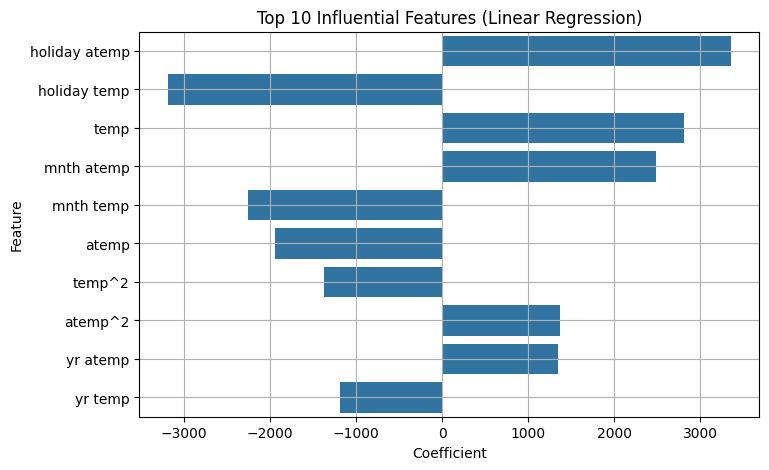

In [ ]:
import seaborn as sns

# Get feature names and coefficients
features = poly.get_feature_names_out(input_features=X.columns)
coefficients = lr.coef_

# Create DataFrame
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute importance
coef_df['Abs_Coeff'] = coef_df['Coefficient'].abs()
top_features = coef_df.sort_values('Abs_Coeff', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title("Top 10 Influential Features (Linear Regression)")
plt.grid(True)
plt.show()


### 13. Final Report

In this project, I explored and implemented various linear models to predict daily bike rental counts using the Bike Sharing Dataset from the UCI Machine Learning Repository. The dataset contains features such as weather conditions, season, holiday status, temperature, humidity, and windspeed, along with the target variable `cnt` representing the total number of rentals. To ensure accurate predictions and fair training, I removed irrelevant columns such as `instant`, `dteday`, `casual`, and `registered`, which could cause data leakage.

The dataset was preprocessed using feature scaling (`StandardScaler`), and polynomial feature expansion (degree 2) was applied to allow linear models to capture non-linear relationships in the data. I trained and evaluated four models: Linear Regression (Normal Equation), Ridge Regression, Lasso Regression, and SGD Regressor.

Model evaluation gives the following results:

* **Linear Regression** gave an RMSE of around 823,795 and an R² of 0.795.
* **Ridge Regression** performed the best with an RMSE of 529,583 and R² of 0.868.
* **Lasso Regression** achieved an RMSE of 598,762 and R² of 0.851.
* **SGD Regressor** failed to converge properly and resulted in an extremely large error and a negative R², indicating divergence likely due to improper learning rate or scaling issues.

We then plotted learning curves for Ridge Regression. The plots showed a small gap between training and validation RMSE, indicating a well-generalized model with low variance and low bias. This confirmed that Ridge was a suitable model for the given dataset and feature complexity.

Hyperparameter tuning was carried out using `GridSearchCV` to identify the best regularization strength (`alpha`) for Ridge and Lasso regressions. The optimal alpha for Ridge was found to be 10, with a cross-validated RMSE of approximately 766.5. For Lasso, the best alpha was also 10, with a slightly better RMSE of 745.8, though several convergence warnings were raised, suggesting the need for more iterations or further scaling adjustments.

Finally, we visualized the top 10 most influential features in the Linear Regression model. This helped identify which features (or polynomial interactions) had the most significant impact on bike rental predictions. Such insights are valuable for business decisions, such as adjusting rental pricing or marketing based on weather and seasonality.

In conclusion, Ridge Regression provided the most balanced and accurate results on this dataset, effectively reducing overfitting caused by polynomial features.

This project gives the practical application of regularization, gradient-based optimization, and feature engineering to improve model performance in a real-world regression task.

---


---





# **Comparative Analysis:**

##**1. Model Comparison**

We evaluated four different models on the Bike Sharing dataset using polynomially expanded features:

- Linear Regression resulted in an RMSE of approximately 823,795 and an R² score of 0.795. It was fast to train but overfit the data due to the complexity introduced by polynomial features.

- Ridge Regression performed the best overall, with an RMSE of 529,583 and an R² of 0.868. It provided excellent generalization and handled multicollinearity well. Training time was slightly longer than Linear Regression due to regularization, but still efficient.

- Lasso Regression gave an RMSE of 598,762 and R² of 0.851. It performed better than plain Linear Regression but slightly worse than Ridge. It was slower to converge and showed warnings due to the complexity of polynomial features and insufficient iterations. However, Lasso helped reduce the impact of less useful features, offering a sparse solution.

- SGD Regressor failed to converge, producing an enormous error and a highly negative R². This happened because gradient-based optimizers like SGD are very sensitive to learning rate and scaling, especially when combined with polynomial features. It was the fastest in training, but unstable and inaccurate without careful tuning.

- For feature importance, we used the absolute value of coefficients from the Linear Regression model. The top influential features included combinations of temperature, humidity, and seasonal indicators. These aligned well with real-world expectations — as weather and time of year clearly affect bike usage.

For feature importance, we used the absolute value of coefficients from the Linear Regression model. The top influential features included combinations of temperature, humidity, and seasonal indicators. These aligned well with real-world expectations as weather and time of year clearly affect bike usage.


## **2. Report Discussion**

-  Why Certain Algorithms Performed Better/Worse
Ridge Regression outperformed others because it penalized large coefficients, preventing overfitting caused by the high number of polynomial features. Linear Regression, while simple and fast, lacked regularization and hence overfitted. Lasso Regression tried to shrink and remove irrelevant features but struggled to converge fully with this data size and complexity. SGD failed mainly due to sensitivity to learning rate, poor initialization, and the expanded feature set.

- Impact of Polynomial Degree on Overfitting
Expanding features to polynomial degree 2 significantly increased model complexity. This allowed Linear Regression to fit the training data very closely but at the cost of generalization, as seen in its higher RMSE on the test set. Ridge and Lasso mitigated this overfitting by regularizing the polynomial terms. Increasing the degree further would likely worsen overfitting unless strong regularization or dimensionality reduction is applied.

-  Practical Applications of the Trained Models
The trained models can help city planners and bike rental companies forecast daily demand, optimize inventory and staffing, and develop dynamic pricing strategies. By understanding how weather, time, and holidays affect bike usage, they can make data_driven decisions to enhance operations and customer satisfaction. Ridge Regression, in particular, provides a robust predictive tool for such planning tasks.

